# The Data 

Basic imports

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Importing the 'train.csv' file into a DataFrame:

In [191]:
data = pd.read_csv('input/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The complete description of the variables can be found either in the `'README.md'` file or on [Kaggle](https://www.kaggle.com/c/titanic/data).

In [3]:
data.shape

(891, 11)

We have 891 observations of 11 variables. Let's dive into them more carefully:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Let's check for missing values:

In [5]:
#Checking for missing data
NAs = pd.concat([data.isnull().sum()], axis=1, keys=['Train'])
NAs[NAs.sum(axis=1) > 0]

,Train
Age,177
Cabin,687
Embarked,2


We see that `'Age'`, `'Cabin'` and `'Embarked'` are the only columns that have missing values with which we will have to deal.

## EDA 

### 1. Survived 

`'Survived'` is our **target array**. Plotting the target array will tell us whether our data is balanced or imbalanced.

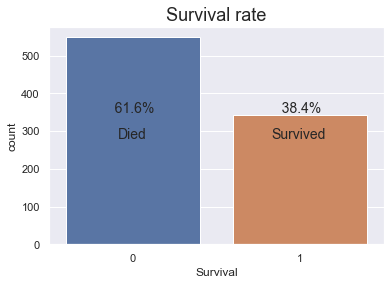

In [16]:
sns.countplot(x='Survived', data=data)
plt.title('Survival rate', fontsize=18)
plt.xlabel('Survival')
plt.text(-0.18, 350, str(format(data['Survived'].value_counts(normalize=True)[0]*100,'7.1f')) + '% ', size=14)
plt.text(-0.09, 280, 'Died', size=14);
plt.text(0.82, 350, str(format(data['Survived'].value_counts(normalize=True)[1]*100,'7.1f')) + '% ', size=14);
plt.text(0.83, 280, 'Survived', size=14);

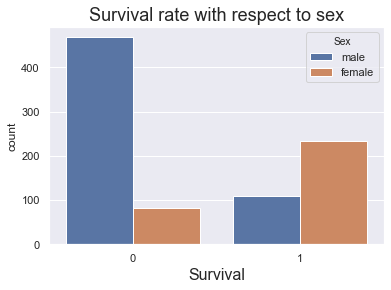

In [12]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival rate with respect to sex', fontsize=18)
plt.xlabel('Survival', fontsize=16);

Here we see that our data is slightly skewed, so when possible it will probably be better to set the model's hyperparameter `class_weight='balanced'`.

### 2. Pclass

As mentioned above, this is a categorical feature. Hence, we will either change its entries into strings or use appropraite numerical data that actually reflect  when feature engineering the  data.

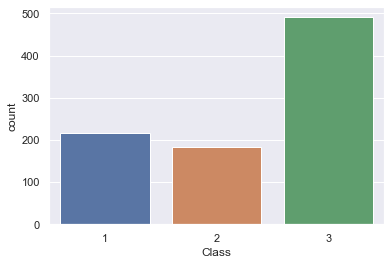

In [192]:
sns.countplot(x='Pclass', data=data)
plt.xlabel('Class');

In [27]:
suffix = ['st', 'nd', 'rd']
for i in [1,2,3]:
    print(str(format(data['Pclass'].value_counts(normalize=True)[i]*100,'1.1f')) 
      +'% of passengers travelled in {0}'.format(i) + suffix[i-1] + ' class.')

24.2% of passengers travelled in 1st class.
20.7% of passengers travelled in 2nd class.
55.1% of passengers travelled in 3rd class.


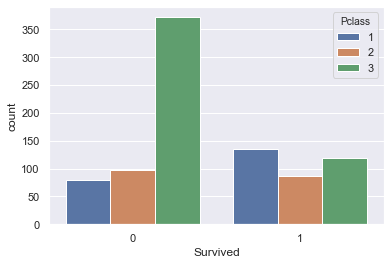

In [18]:
sns.countplot(x='Survived', hue='Pclass', data=data)

In [ ]:
sns.violinplt(x='Survived')

### 3. Name 

In [38]:
data['Name'].describe()

count                              891
unique                             891
top       Jacobsohn, Mr. Sidney Samuel
freq                                 1
Name: Name, dtype: object

Since all the entries of the `'Name'` column are unique, I will keep just the title.


### 4. Sex 

In [30]:
print(str(format(data['Sex'].value_counts(normalize=True)['male']*100,'1.1f')) 
      +'% of passengers were males')
print(str(format(data['Sex'].value_counts(normalize=True)['female']*100,'1.1f')) 
      +'% of passengers were females')

64.8% of passengers were males
35.2% of passengers were females


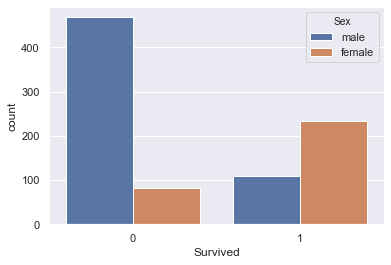

In [60]:
sns.countplot(x='Survived', hue='Sex', data=data);

The survival rate is higher for women than for men.

### 5. Age 

In [32]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

As highlighted above, 177 entries are missing (20% of the data). Therefore, when feature engineering, we will have to use some simple **imputation approach**, such as substituting the missing values with the mean value.

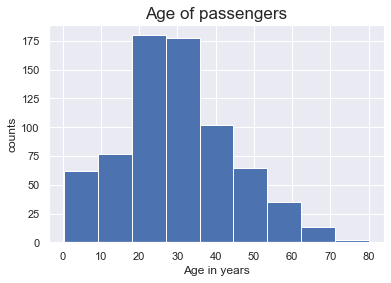

In [59]:
plt.hist(data['Age'], 9)
plt.xlabel('Age in years')
plt.ylabel('counts')
plt.title('Age of passengers', size=17);

The majority of passengers have between 20 and 40 years of age.

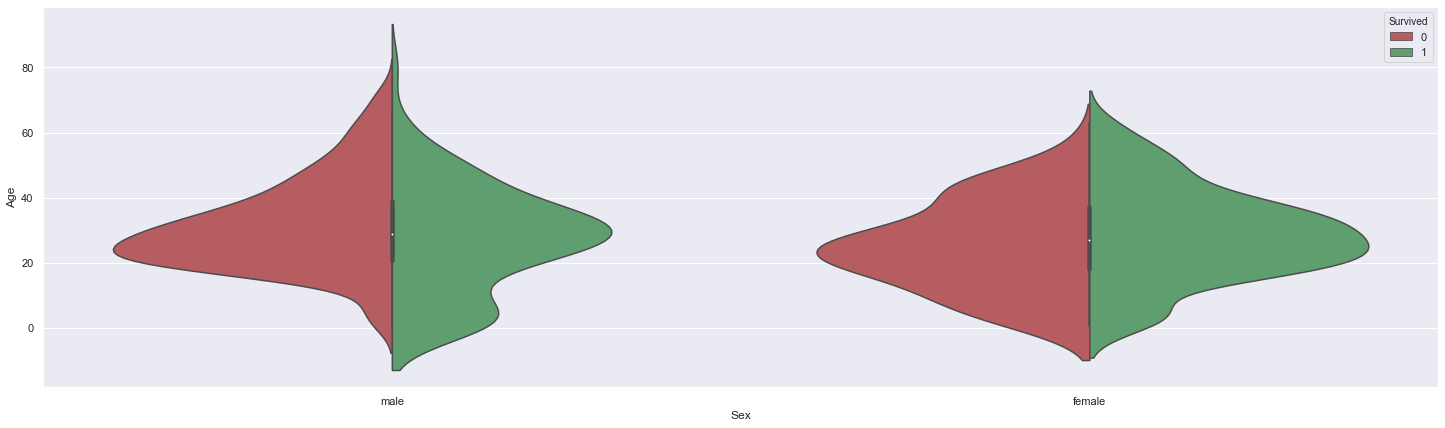

In [57]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=data, 
               split=True,
               palette={0: "r", 1: "g"});

It seems that in men the age conditions the survival more than in women.

### 6. SibSp 

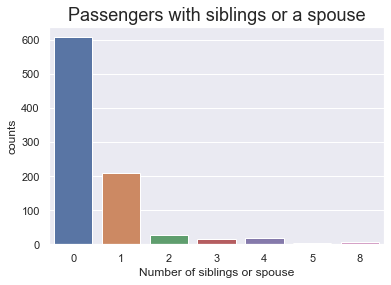

In [26]:
sns.countplot(x='SibSp', data=data)
plt.xlabel('Number of siblings or spouse')
plt.ylabel('counts')
plt.title('Passengers with siblings or a spouse', size=18);

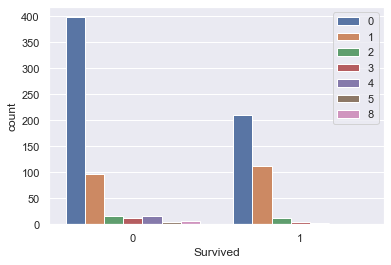

In [31]:
sns.countplot(x='Survived', data=data, hue='SibSp')
plt.legend(loc='upper right');

### 7. Parch 

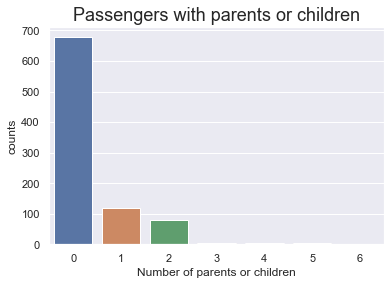

In [27]:
sns.countplot(x='Parch', data=data)
plt.xlabel('Number of parents or children')
plt.ylabel('counts')
plt.title('Passengers with parents or children', size=18);

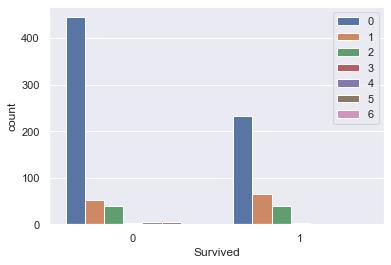

In [32]:
sns.countplot(x='Survived', data=data, hue='Parch')
plt.legend(loc='upper right');

I will combine `'SibSp'` and `'Parch'` in a new feature: `'Family'` and divide the variables as follows:
- 0 = 'alone'
- 1<= x < 4 = 'small' family
- x >= 4 = 'large family

### 8. Ticket 

In [37]:
data['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

Due to the high number of unique entries, the `'Ticket'` column also requires some preprocessing in order to extract interesting information from it.

For simplicity, I will drop this column for my first analysis.

### 9. Fare 

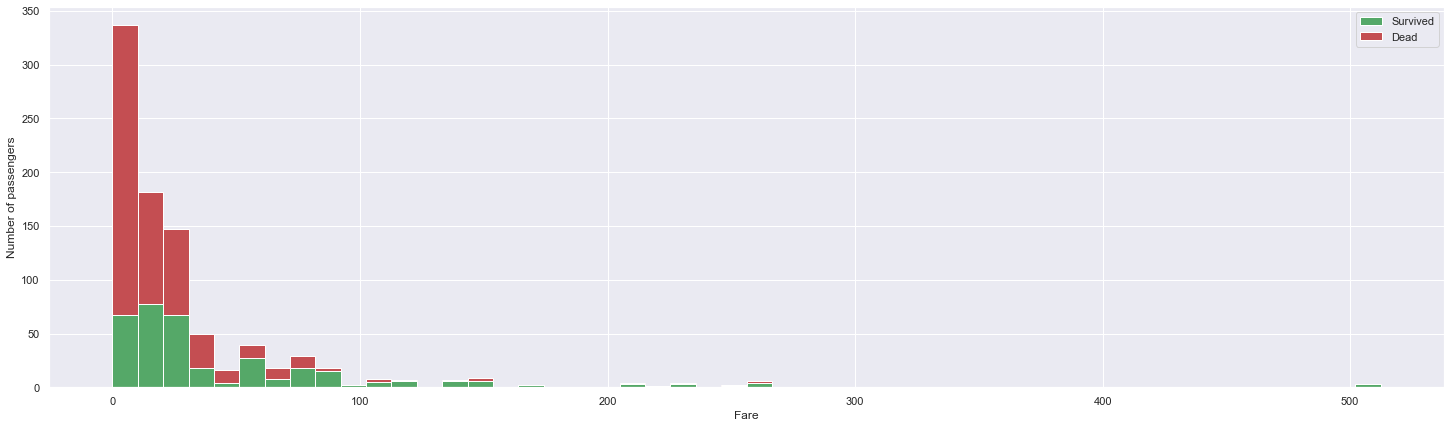

In [63]:
figure = plt.figure(figsize=(25, 7))
plt.hist([data[data['Survived'] == 1]['Fare'], data[data['Survived'] == 0]['Fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived', 'Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend();

It seems that people with cheaper tickets were more likely to succumb. This was already clear when analyzin the `'Pclass'` feature, where we saw that people from the 3rd class were more likely to die than people from the 1st class. In fact, the average fare is related to the class as shown by the bat plot:

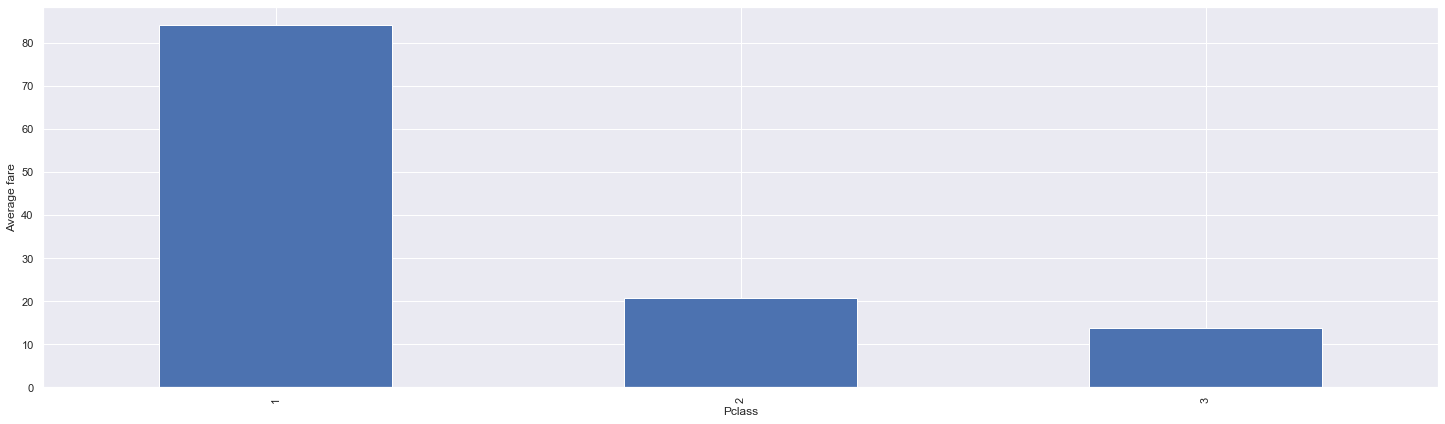

In [64]:
ax = plt.subplot()
ax.set_ylabel('Average fare')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar', figsize=(25, 7), ax = ax);

In [66]:
data.groupby('Pclass').mean()['Fare']

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [68]:
data.groupby('Sex').mean()['Age']

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

### 10. Cabin 

In [40]:
data['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

Most of the `'Cabin'` entries are missing values (77%). I will drop this column in future analysis.

### 11. Embarked 

As mentioned before, 2 of the `'Embarked'` entries are missing. I will then use some simple **imputation approach**, such as substituting the missing values with the mode value (the most frequent value).

In [43]:
ports = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
for i, entry in enumerate(data['Embarked'].dropna().unique()):
        print(str(format(data['Embarked'].value_counts(normalize=True)[entry]*100,'1.1f')) 
              + '% of passengers embarked in ' + ports[entry] + '.')

72.4% of passengers embarked in Southampton.
18.9% of passengers embarked in Cherbourg.
8.7% of passengers embarked in Queenstown.


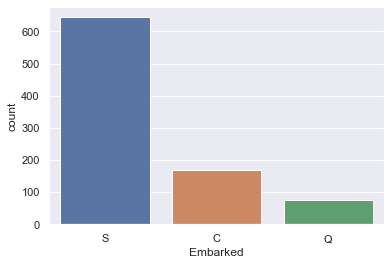

In [72]:
sns.countplot(x='Embarked', data=data);

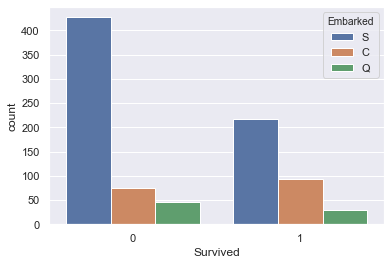

In [73]:
sns.countplot(x='Survived', hue='Embarked', data=data);

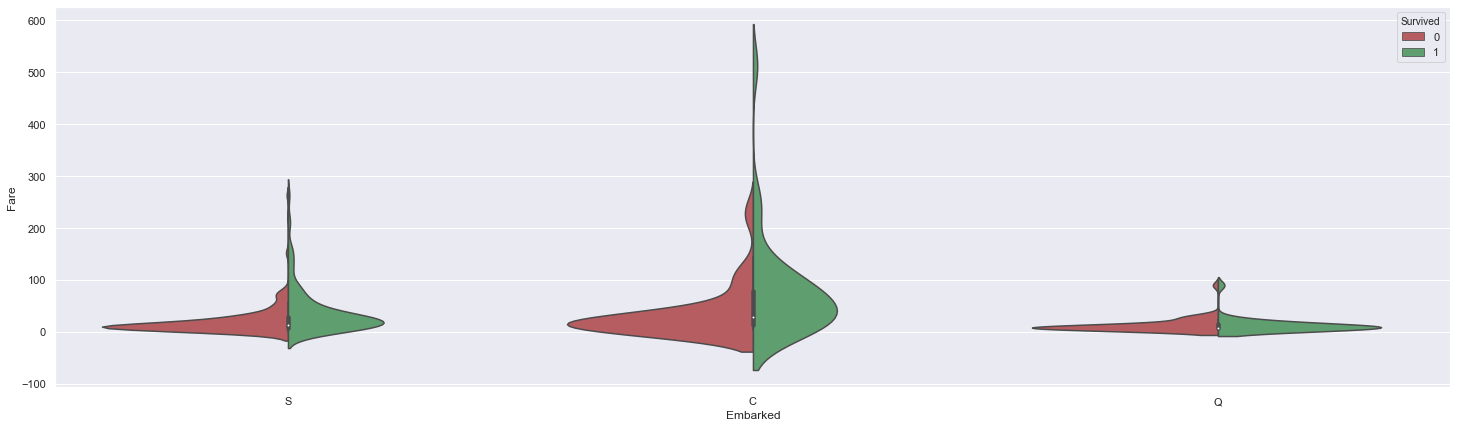

In [78]:
fig = plt.figure(figsize=(25, 7))
sns.violinplot(x='Embarked', y='Fare', 
               hue='Survived', data=data, 
               split=True,
               palette={0: "r", 1: "g"});

## Summary 

- The **target array** (`data['Survived']`) is slightly skewed. When possible, I will set the hyperparameter `class_weight` to `'balanced'`. 
- I will change the entries of the `Pclass` column into strings, as it is a **categorical feature**.
- I will create a `Title` column and drop the `Name` column
- I will **drop** the features that need too much preprocessing or have a lot of missing data, such as `Ticket` and `Cabin`.
- I will **fill the missing values** of `Age` using the mean based on `Sex`, `Pclass` and `Title`.
- I will **fill the missing values** of `Embarked` using the most frequent one;
- I will **encode the categorical features**.